In [1]:
#scale the data
#initialize centroids
#label each data point
#plot the centroids
#repeat 3-5 until centroids stops changing

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output
#import in neede libraries

In [3]:
best_pose = pd.read_csv('/home/jle_linux/Desktop/TDMprivate/data/06cbdbc0-db4d-11ee-a158-97f8443fd730/' +
                                 '_apollo_sensor_gnss_best_pose/' +
                                 '06cbdbc0-db4d-11ee-a158-97f8443fd730_apollo_sensor_gnss_best_pose.csv')

In [4]:
best_pose.head()
#checked to see the beginning of the data and its variables

,heightMsl,groupMetadataID,latitudeStdDev,longitude,solType,extendedSolutionStatus,time,heightStdDev,solStatus,latitude,longitudeStdDev,numSatsInSolution
0,202.979063,06cbdbc0-db4d-11ee-a158-97f8443fd730,0.010338,-82.127898,NARROW_INT,33,1693494302079024174,0.021565,SOL_COMPUTED,39.329569,0.008520,14
1,202.976077,06cbdbc0-db4d-11ee-a158-97f8443fd730,0.010329,-82.127898,NARROW_INT,33,1693494303047747084,0.021566,SOL_COMPUTED,39.329569,0.008518,14
2,202.976105,06cbdbc0-db4d-11ee-a158-97f8443fd730,0.010346,-82.127898,NARROW_INT,33,1693494304060687314,0.021597,SOL_COMPUTED,39.329569,0.008539,14
3,202.978510,06cbdbc0-db4d-11ee-a158-97f8443fd730,0.010317,-82.127898,NARROW_INT,33,1693494305053737259,0.021528,SOL_COMPUTED,39.329569,0.008509,14
4,202.979463,06cbdbc0-db4d-11ee-a158-97f8443fd730,0.010343,-82.127898,NARROW_INT,33,1693494306051479383,0.021557,SOL_COMPUTED,39.329569,0.008513,14


In [5]:
features = [ "latitude", "longitude", "latitudeStdDev", "longitudeStdDev", "numSatsInSolution" ]
#created a selection on variables/column that I believed were important and wanted to use

In [6]:
best_pose = best_pose.dropna(subset=features)
#deleted any na or missing values, I believe that this dataset had none (would not do this again, since all data is deemed as important)

In [7]:
data = best_pose[features].copy()
#creates a copy of the original data with on the subset features and columns I wanted 

In [8]:
data
#show the data

,latitude,longitude,latitudeStdDev,longitudeStdDev,numSatsInSolution
0,39.329569,-82.127898,0.010338,0.008520,14
1,39.329569,-82.127898,0.010329,0.008518,14
2,39.329569,-82.127898,0.010346,0.008539,14
3,39.329569,-82.127898,0.010317,0.008509,14
4,39.329569,-82.127898,0.010343,0.008513,14
...,...,...,...,...,...
1751,39.334020,-82.132185,0.012971,0.012548,13
1752,39.333891,-82.132086,0.012043,0.010646,13
1753,39.333760,-82.131997,0.011846,0.010292,13
1754,39.333631,-82.131915,0.011899,0.010357,13


In [9]:
data = ((data - data.min())/(data.max()-data.min())) * 9 + 1
#minimize the data to be able to ensure no column is prioritized over another.

In [10]:
data.describe()
#you can see that my minimum is now 1 and maximum is now 10

,latitude,longitude,latitudeStdDev,longitudeStdDev,numSatsInSolution
count,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000
mean,4.972540,4.991859,1.091792,1.155680,8.220794
std,2.931015,2.942645,0.396620,0.558958,1.331882
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.345338,2.837974,1.001592,1.003484,7.428571
50%,4.257716,3.744505,1.003788,1.007438,8.714286
75%,8.096456,8.182134,1.007851,1.013347,9.357143
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [11]:
data.head()

,latitude,longitude,latitudeStdDev,longitudeStdDev,numSatsInSolution
0,2.380293,4.443416,1.000152,1.000042,10.0
1,2.380293,4.443416,1.000145,1.000039,10.0
2,2.380291,4.443413,1.000158,1.000065,10.0
3,2.380291,4.443418,1.000136,1.000028,10.0
4,2.380300,4.443416,1.000156,1.000032,10.0


In [12]:
def random_centroids(data,k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)
#a function that will take in the number of clusters we want with our data
#initialize a list called centroids for i in range k
#then add it to the list of centroids
#the number of centroids is equivalent to the number of clusters we want
#combines all of the centroids(individual pandas series) into a data frame

In [13]:
centroids = random_centroids(data,5)
#we can now run the random_centroids

/tmp/ipykernel_117654/973749533.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [14]:
centroids

,0,1,2,3,4
latitude,9.356748,8.552036,4.679883,8.773288,2.088679
longitude,1.115241,2.327931,5.557771,3.319261,3.338259
latitudeStdDev,1.003969,1.039938,1.002187,1.003203,1.000255
longitudeStdDev,1.007134,1.014376,2.186008,1.000933,1.005895
numSatsInSolution,9.357143,9.357143,7.428571,8.714286,7.428571


In [15]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)
#label each data point 
#finds the euclidean distance between a data point and each cluster for all centroids 
#finding which cluster center is closest to that point 

In [16]:
labels = get_labels(data, centroids)

In [17]:
labels.value_counts()
#how many times each value occurs 

2    683
4    394
3    375
1    201
0    103
Name: count, dtype: int64

In [18]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids
#splits the data by each cluster and then calculate a new center for each group

In [19]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()
#Using PCA to change the multidimensional values into 2-D data
#Pass in the several column data and get it converted into 2 column data
#plotting the clusters and coloring from the plotting of centroids 
#will wait and change the graph over the already completed graph 

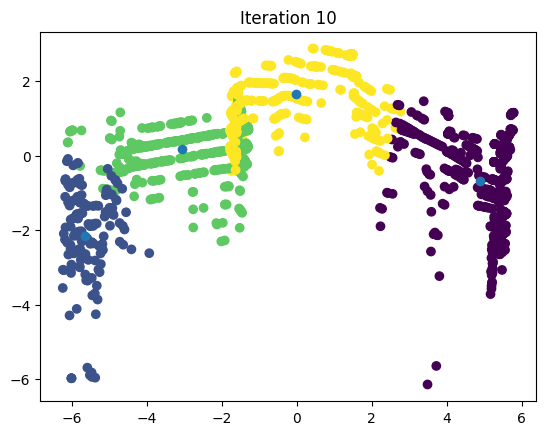

In [20]:
max_iterations = 100
centroid_count = 5

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1
#when new centroids are equilavent to past centroids (indicates that it has stopped shifting)
#update the data to see which label corresponds with each cluster

In [21]:
centroids

,0,1,3,4
latitude,1.918677,9.266271,7.580009,3.366979
longitude,8.874503,1.404322,3.228519,3.347626
latitudeStdDev,1.058346,1.430444,1.007663,1.007025
longitudeStdDev,1.106275,1.641148,1.013691,1.010578
numSatsInSolution,7.911428,5.762300,8.810287,8.485517


In [22]:
labels.value_counts()

3    574
0    570
4    430
1    182
Name: count, dtype: int64

In [23]:
best_pose[labels == 0][["groupMetadataID"] + features]

,groupMetadataID,latitude,longitude,latitudeStdDev,longitudeStdDev,numSatsInSolution
81,06cbdbc0-db4d-11ee-a158-97f8443fd730,39.327308,-82.120713,0.018891,0.016471,10
83,06cbdbc0-db4d-11ee-a158-97f8443fd730,39.327082,-82.120284,0.019436,0.019791,11
84,06cbdbc0-db4d-11ee-a158-97f8443fd730,39.326969,-82.120069,0.019561,0.019710,11
85,06cbdbc0-db4d-11ee-a158-97f8443fd730,39.326856,-82.119854,0.018754,0.015556,11
86,06cbdbc0-db4d-11ee-a158-97f8443fd730,39.326744,-82.119639,0.019011,0.016135,11
...,...,...,...,...,...,...
647,06cbdbc0-db4d-11ee-a158-97f8443fd730,39.330853,-82.120035,0.069789,0.093003,8
648,06cbdbc0-db4d-11ee-a158-97f8443fd730,39.330897,-82.120207,0.085627,0.094559,8
652,06cbdbc0-db4d-11ee-a158-97f8443fd730,39.330996,-82.120916,0.163483,0.134355,7
653,06cbdbc0-db4d-11ee-a158-97f8443fd730,39.331012,-82.121096,0.183725,0.142387,6


In [24]:
best_pose[labels == 5][["groupMetadataID"] + features]
#shows the data in which cluster they are in, hence there is no cluster 5

,groupMetadataID,latitude,longitude,latitudeStdDev,longitudeStdDev,numSatsInSolution


In [25]:
from sklearn.cluster import KMeans

In [26]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [27]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
latitude,1.974510,8.528487,4.119710
longitude,8.937829,2.630226,3.582663
latitudeStdDev,1.075622,1.184031,1.007420
longitudeStdDev,1.167997,1.276684,1.011111
numSatsInSolution,8.032093,8.105756,8.537102


In [28]:
from sklearn.cluster import KMeans

In [29]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
c0= best_pose[labels == 0][["groupMetadataID"] + features]

<Axes: xlabel='latitude', ylabel='longitude'>

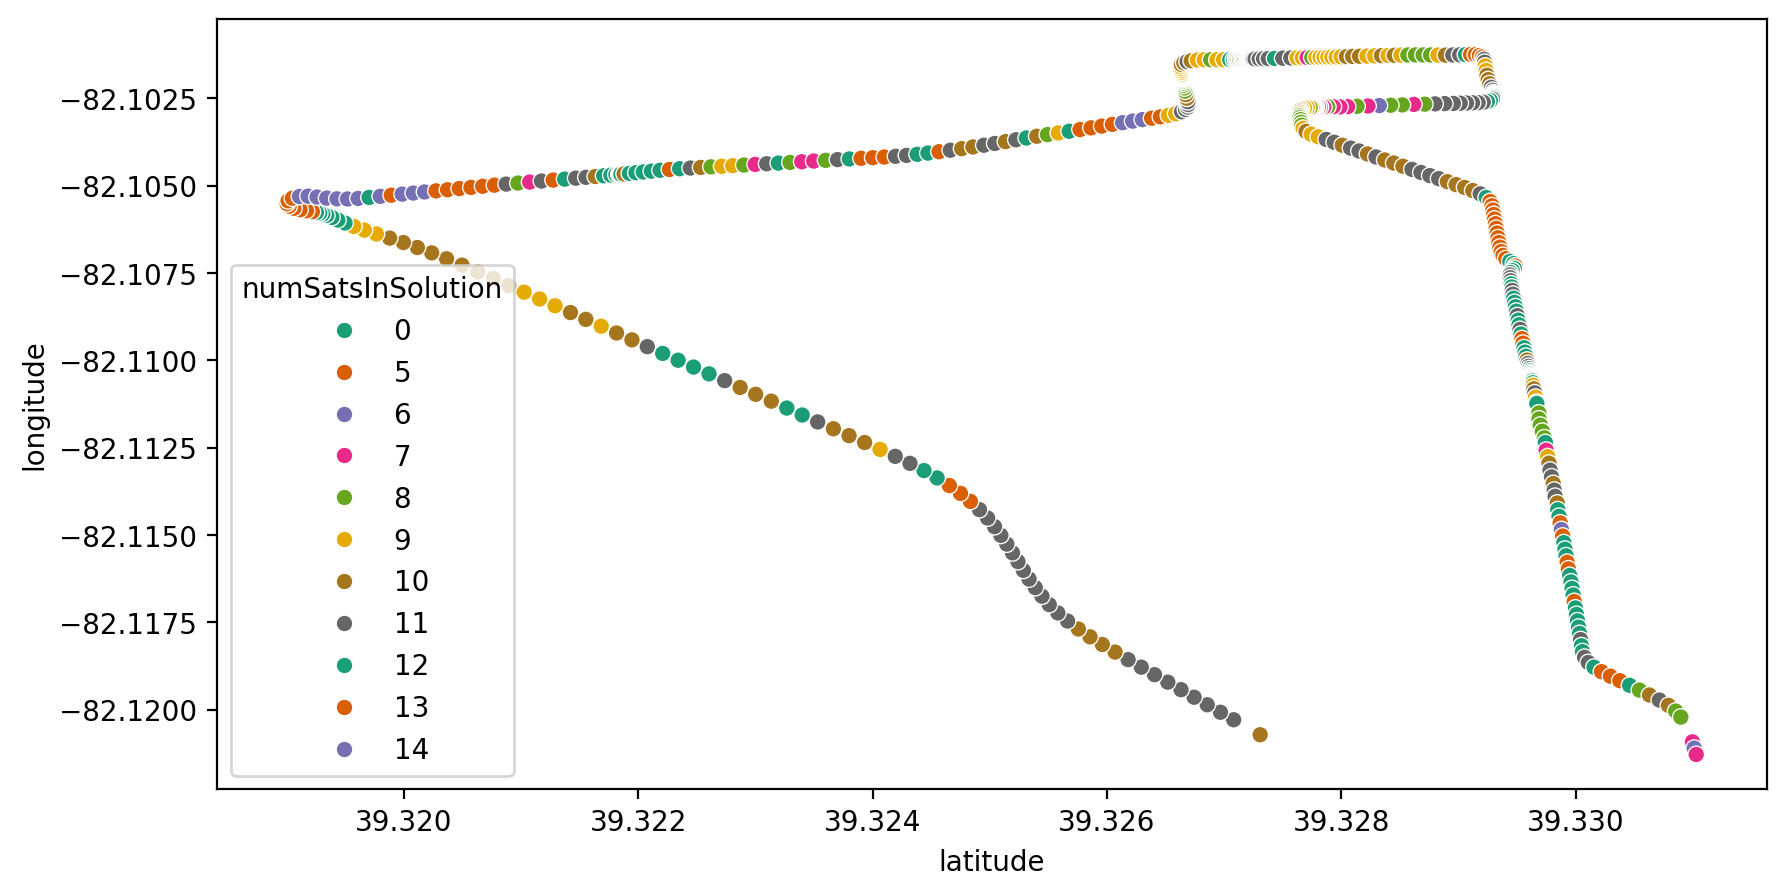

In [31]:
plt.figure(figsize=(10,5), dpi = 200)
sns.scatterplot(x = 'latitude', y = 'longitude', data = c0, hue = 'numSatsInSolution', palette = 'Dark2')

In [32]:
c1= best_pose[labels == 1][["groupMetadataID"] + features]

<Axes: xlabel='latitude', ylabel='longitude'>

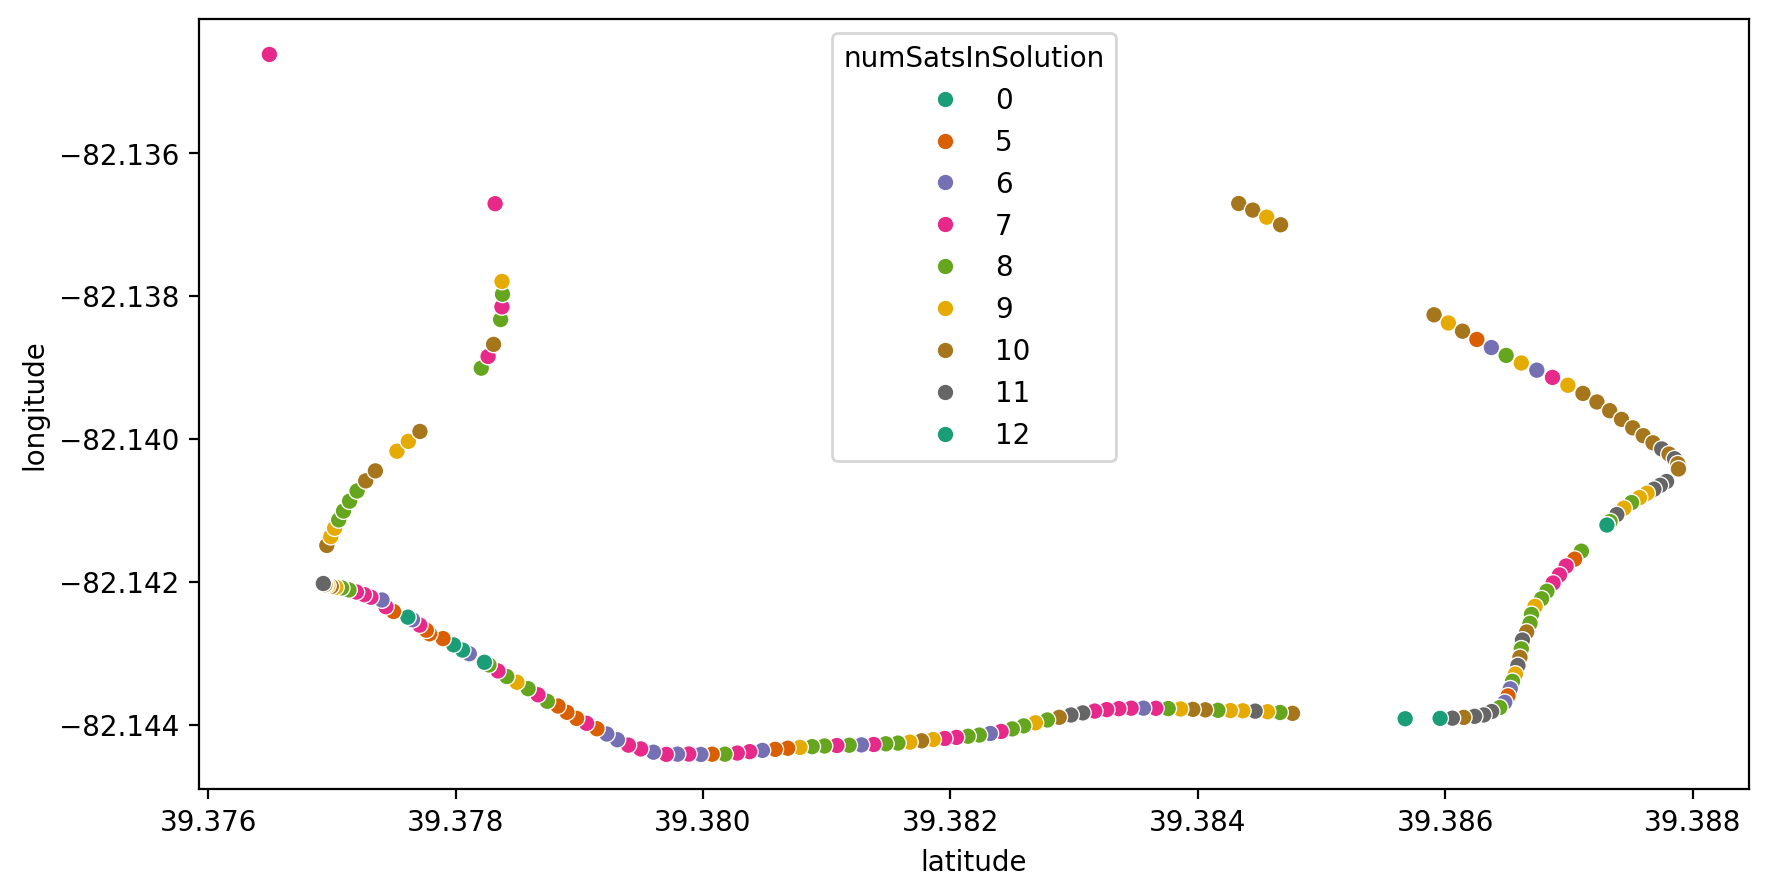

In [33]:
plt.figure(figsize=(10,5), dpi = 200)
sns.scatterplot(x = 'latitude', y = 'longitude', data = c1, hue = 'numSatsInSolution', palette = 'Dark2')

In [34]:
c2= best_pose[labels == 2][["groupMetadataID"] + features]

/tmp/ipykernel_117654/2373729958.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = 'latitude', y = 'longitude', data = c2, hue = 'numSatsInSolution', palette = 'Dark2')


<Axes: >

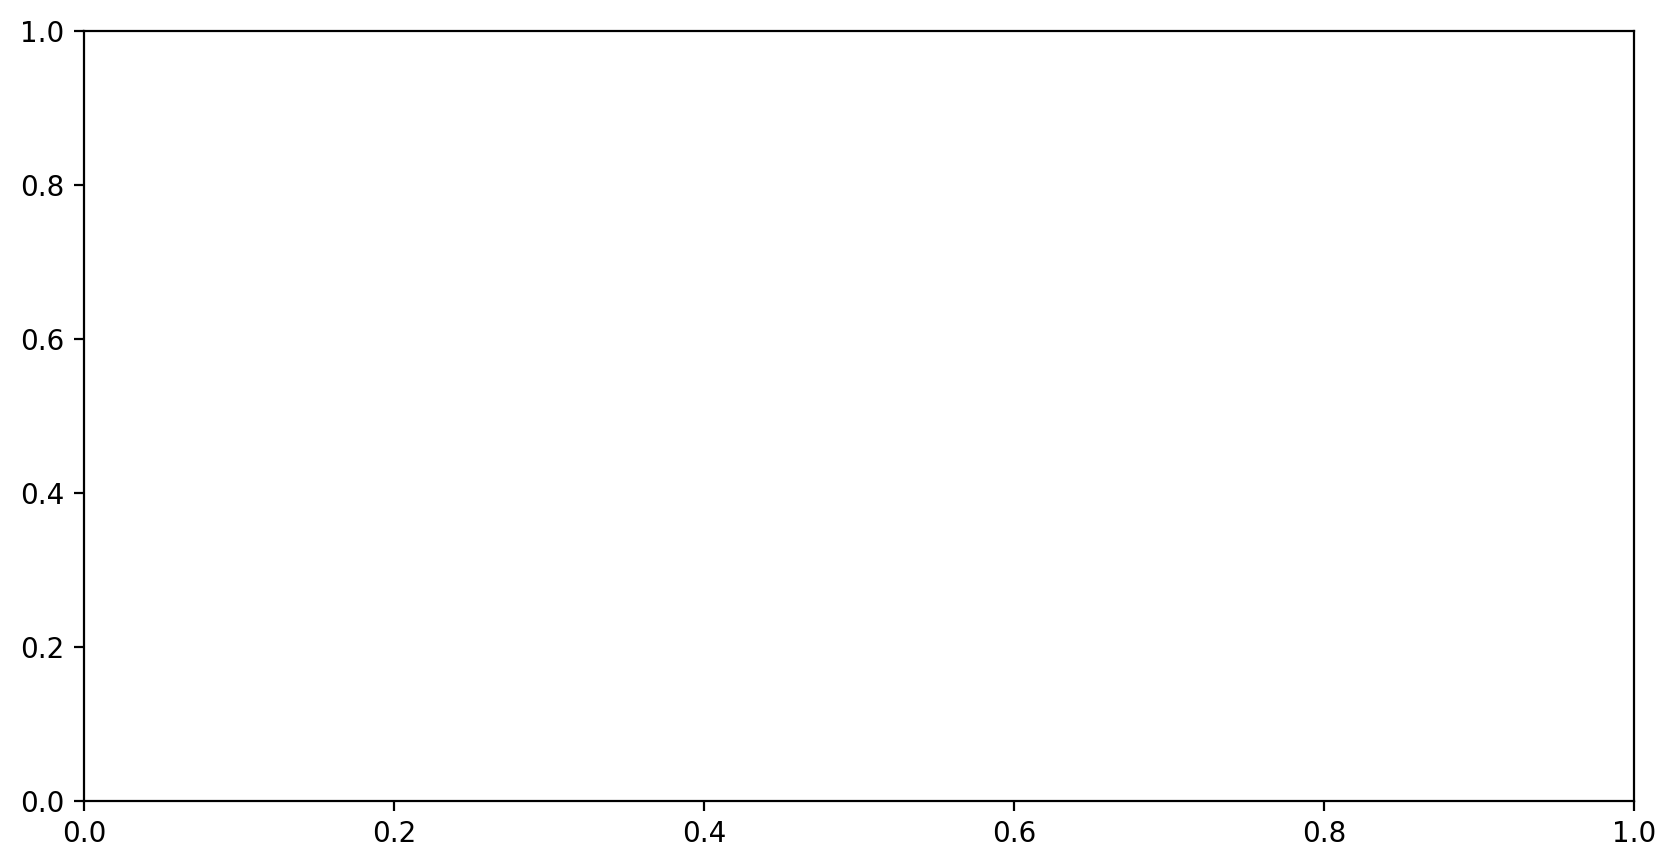

In [35]:
plt.figure(figsize=(10,5), dpi = 200)
sns.scatterplot(x = 'latitude', y = 'longitude', data = c2, hue = 'numSatsInSolution', palette = 'Dark2')

In [36]:
chasis = pd.read_csv("/home/jle_linux/Desktop/TDMprivate/data/0b72a836-f37e-11ee-bb4e-fb353e7798cd/_apollo_canbus_chassis/0b72a836-f37e-11ee-bb4e-fb353e7798cd_apollo_canbus_chassis.csv")

In [37]:
chasis.head()

,brakePercentage,groupMetadataID,drivingMode,speedMps,time,throttlePercentage,steeringPercentage,signal.turnSignal
0,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.92,1707420476851932894,17.4,-73.104800,TURN_RIGHT
1,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.93,1707420476883899750,17.4,-72.664055,TURN_RIGHT
2,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.96,1707420476917887466,17.4,-72.184135,TURN_RIGHT
3,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.99,1707420476950430948,17.4,-71.567090,TURN_RIGHT
4,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,4.02,1707420476983802634,17.4,-71.087166,TURN_RIGHT


In [38]:
best_pose.head()

,heightMsl,groupMetadataID,latitudeStdDev,longitude,solType,extendedSolutionStatus,time,heightStdDev,solStatus,latitude,longitudeStdDev,numSatsInSolution
0,202.979063,06cbdbc0-db4d-11ee-a158-97f8443fd730,0.010338,-82.127898,NARROW_INT,33,1693494302079024174,0.021565,SOL_COMPUTED,39.329569,0.008520,14
1,202.976077,06cbdbc0-db4d-11ee-a158-97f8443fd730,0.010329,-82.127898,NARROW_INT,33,1693494303047747084,0.021566,SOL_COMPUTED,39.329569,0.008518,14
2,202.976105,06cbdbc0-db4d-11ee-a158-97f8443fd730,0.010346,-82.127898,NARROW_INT,33,1693494304060687314,0.021597,SOL_COMPUTED,39.329569,0.008539,14
3,202.978510,06cbdbc0-db4d-11ee-a158-97f8443fd730,0.010317,-82.127898,NARROW_INT,33,1693494305053737259,0.021528,SOL_COMPUTED,39.329569,0.008509,14
4,202.979463,06cbdbc0-db4d-11ee-a158-97f8443fd730,0.010343,-82.127898,NARROW_INT,33,1693494306051479383,0.021557,SOL_COMPUTED,39.329569,0.008513,14


In [39]:
chasis.head()

,brakePercentage,groupMetadataID,drivingMode,speedMps,time,throttlePercentage,steeringPercentage,signal.turnSignal
0,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.92,1707420476851932894,17.4,-73.104800,TURN_RIGHT
1,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.93,1707420476883899750,17.4,-72.664055,TURN_RIGHT
2,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.96,1707420476917887466,17.4,-72.184135,TURN_RIGHT
3,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.99,1707420476950430948,17.4,-71.567090,TURN_RIGHT
4,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,4.02,1707420476983802634,17.4,-71.087166,TURN_RIGHT


In [40]:
combine.head()

NameError: name 'combine' is not defined

In [ ]:
new = pd.merge(chasis,best_pose, how = 'inner' )

In [ ]:
new.head()